In [1]:
""" Imports """

import time
import os

import torch

from utils import *

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

/usr/local/packages/python-3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
""" Style model """

MODEL = "mosaic"

In [3]:
""" Load input image """

input_img = image_loader("images/toronto.jpg", size=256)

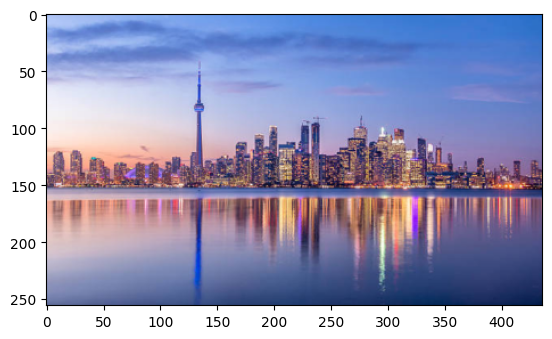

In [4]:
imshow(input_img)

In [6]:
""" load models """

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
style_subnet = torch.load('models/trained_style_subnet' + "_" + MODEL + '.pt', map_location='cpu').eval().to(device)
enhance_subnet = torch.load('models/trained_enhance_subnet' + "_" + MODEL + '.pt', map_location='cpu').eval().to(device)
refine_subnet = torch.load('models/trained_refine_subnet' + "_" + MODEL + '.pt', map_location='cpu').eval().to(device)

Start transforming on cpu..
Image transformed. Time for pass: 7.75s


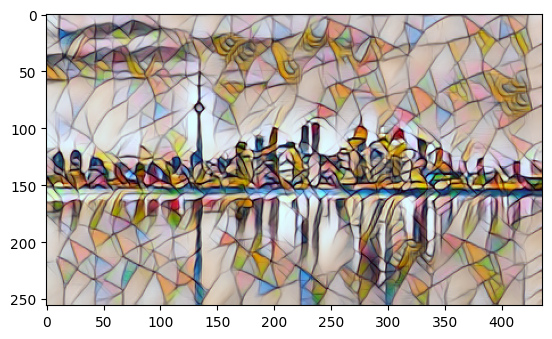

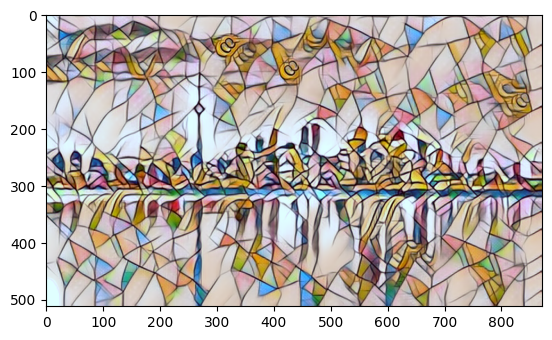

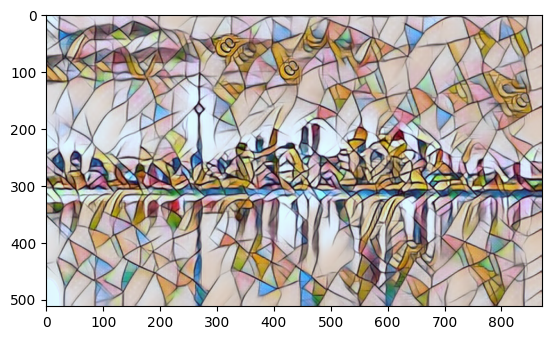

In [7]:
""" Transform """

print("Start transforming on {}..".format(device))
start = time.time()
with torch.no_grad():
    generated_img_256, resized_input_img_256 = style_subnet(input_img)
    generated_img_512, resized_input_img_512 = enhance_subnet(generated_img_256)
    generated_img_1024, resized_input_img_1024 = refine_subnet(generated_img_512)
print("Image transformed. Time for pass: {:.2f}s".format(time.time() - start))

imshow(generated_img_256)
imshow(generated_img_512)
imshow(generated_img_1024)
save_image(generated_img_256, title="generated/multimodal_" + MODEL + "_256")
save_image(generated_img_512, title="generated/multimodal_" + MODEL + "_512")
save_image(generated_img_1024, title="generated/multimodal_" + MODEL + "_1024")

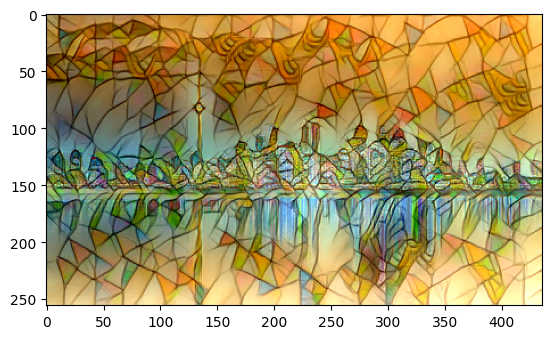

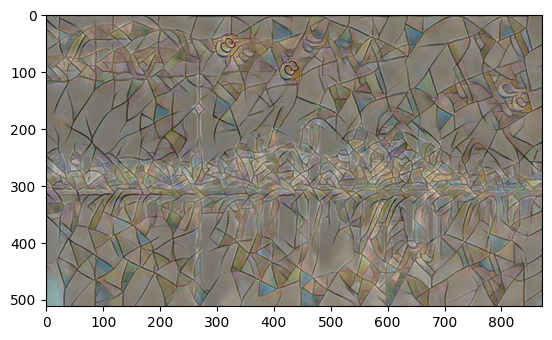

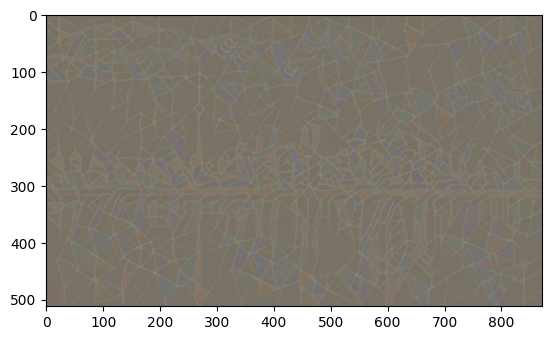

In [8]:
diff_256_orig = generated_img_256 - resized_input_img_256
diff_512_256 = generated_img_512 - resized_input_img_512
diff_1024_512 = generated_img_1024 - resized_input_img_1024
imshow(diff_256_orig)
imshow(diff_512_256)
imshow(diff_1024_512)